<a href="https://colab.research.google.com/github/GruffGemini/ComputationalLinguistics/blob/main/%D0%94%D0%97_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 4.4 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 6.6 MB 33.5 MB/s 
     |████████████████████████████████| 596 kB 32.5 MB/s 
     |████████████████████████████████| 880 kB 38.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=758cb45549dc26f7306d32b9d3d56a7fd9e2e083ee83234bc017025a9b20ea51
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from transformers import TFAutoModel
from transformers import AutoTokenizer
from tqdm.auto import tqdm

In [ ]:
data = pd.read_csv('drive/MyDrive/CompLing FTLM/lenta_sample.csv')
data.dropna(subset=['topic', 'text'], inplace=True)

# Baseline

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-uncased')
model_baseline = TFAutoModel.from_pretrained('bert-base-multilingual-uncased')

Downloading:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
X = []

for text in tqdm(data.title):
    ids = tf.constant([tokenizer.encode(text, add_special_tokens=True)])
    output = model_baseline(ids, output_attentions=False)
    X.append(tf.math.reduce_mean(output[0], axis=1)[0])

  0%|          | 0/607 [00:00<?, ?it/s]

In [ ]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}
y = [label2id[label] for label in data.topic.values]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, stratify=y, random_state=0)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
preds = model.predict(X_val)
print(classification_report(y_val, preds, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

           Бизнес       0.00      0.00      0.00         2
            Спорт       0.00      0.00      0.00         2
        Экономика       0.67      1.00      0.80         2
   Интернет и СМИ       0.50      0.50      0.50         2
              Мир       0.00      0.00      0.00         1
       Библиотека       0.00      0.00      0.00         0
              Дом       1.00      1.00      1.00         2
Силовые структуры       0.50      1.00      0.67         2
             Крым       0.00      0.00      0.00         0
         Из жизни       0.50      0.67      0.57         3
          Легпром       0.00      0.00      0.00         1
   69-я параллель       0.00      0.00      0.00         1
         Ценности       0.00      0.00      0.00         2
           Россия       0.00      0.00      0.00         2
  Наука и техника       0.75      1.00      0.86         3
      Бывший СССР       0.40      0.67      0.50       

F-мера для бейзлайна без дообучения - 0.44

#Дообучение

In [ ]:
X = []

for text in data.title:
    ids = tokenizer.encode(text)
    
    X.append(ids[:512])
  
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic, random_state=0)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-uncased')
model_bert_base_multi = TFAutoModel.from_pretrained('bert-base-multilingual-uncased', trainable=True)

Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")

output = model_bert_base_multi({"input_ids":input_word_ids})
drop = tf.keras.layers.Dropout(0.3)(output[0][:, 0]) 
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(tf.optimizers.Adam(learning_rate=2e-6,
                                    ), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_clf.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=2,
         epochs=20)

Epoch 1/20
288/288 [==============================] - 247s 779ms/step - loss: 2.8733 - accuracy: 0.0573 - rec_prec: 0.0000e+00 - val_loss: 2.7502 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
288/288 [==============================] - 221s 767ms/step - loss: 2.7873 - accuracy: 0.0781 - rec_prec: 0.0000e+00 - val_loss: 2.7169 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 3/20
288/288 [==============================] - 221s 767ms/step - loss: 2.7748 - accuracy: 0.0625 - rec_prec: 0.0000e+00 - val_loss: 2.7113 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 4/20
288/288 [==============================] - 221s 767ms/step - loss: 2.7637 - accuracy: 0.0747 - rec_prec: 0.0000e+00 - val_loss: 2.7078 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 5/20
288/288 [==============================] - 221s 767ms/step - loss: 2.7419 - accuracy: 0.0781 - rec_prec: 0.0000e+00 - val_loss: 2.6921 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 6/20
288/288 [

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


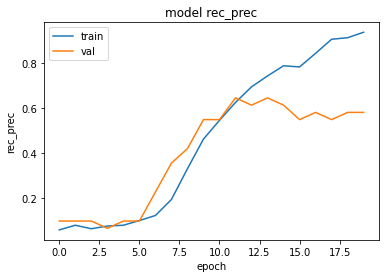

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

  Наука и техника       1.00      0.67      0.80         3
         Культура       1.00      0.67      0.80         3
         Из жизни       0.50      0.33      0.40         3
Силовые структуры       0.50      0.50      0.50         2
          Легпром       0.00      0.00      0.00         1
        Экономика       0.00      0.00      0.00         2
             Крым       0.00      0.00      0.00         0
           Россия       0.00      0.00      0.00         2
         Ценности       0.50      0.50      0.50         2
              Мир       0.25      1.00      0.40         1
   Интернет и СМИ       0.50      0.50      0.50         2
           Бизнес       0.40      1.00      0.57         2
   69-я параллель       1.00      1.00      1.00         1
       Библиотека       0.00      0.00      0.00         0
              Дом       1.00      1.00      1.00         2
      Бывший СССР       0.67      0.67      0.67       

F-мера для модели bert-base-multilingual-uncased - 0.57 (бейзлайн 0.44).
Теперь сравним ее с русскоязычной моделью Distilbert от Geotrend. Это легковесная модель, и она должна обучиться быстрее.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('Geotrend/distilbert-base-ru-cased')
model_distilbert_ru = TFAutoModel.from_pretrained('Geotrend/distilbert-base-ru-cased', trainable=True, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
X = []

for text in data.title:
    ids = tokenizer.encode(text)
    
    X.append(ids[:512])
  
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic, random_state=0)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")

output = model_distilbert_ru({"input_ids":input_word_ids})
drop = tf.keras.layers.Dropout(0.3)(output[0][:, 0]) 
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(tf.optimizers.Adam(learning_rate=2e-6,
                                    ), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_clf.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=2,
         epochs=20)

Epoch 1/20
288/288 [==============================] - 84s 270ms/step - loss: 2.8281 - accuracy: 0.0556 - rec_prec: 0.0000e+00 - val_loss: 2.7272 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
288/288 [==============================] - 76s 265ms/step - loss: 2.7834 - accuracy: 0.0764 - rec_prec: 0.0000e+00 - val_loss: 2.7068 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 3/20
288/288 [==============================] - 76s 265ms/step - loss: 2.7611 - accuracy: 0.0885 - rec_prec: 0.0000e+00 - val_loss: 2.6814 - val_accuracy: 0.1290 - val_rec_prec: 0.0000e+00
Epoch 4/20
288/288 [==============================] - 76s 265ms/step - loss: 2.7553 - accuracy: 0.0608 - rec_prec: 0.0000e+00 - val_loss: 2.6678 - val_accuracy: 0.0968 - val_rec_prec: 0.0323
Epoch 5/20
288/288 [==============================] - 76s 264ms/step - loss: 2.7018 - accuracy: 0.1094 - rec_prec: 0.0000e+00 - val_loss: 2.6286 - val_accuracy: 0.1935 - val_rec_prec: 0.0000e+00
Epoch 6/20
288/288 [=========

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


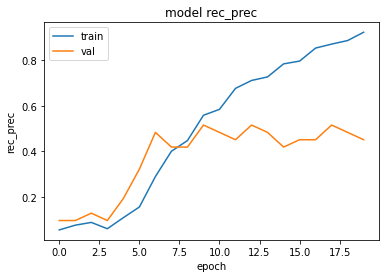

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

         Ценности       0.33      0.50      0.40         2
         Культура       0.67      0.67      0.67         3
   Интернет и СМИ       0.00      0.00      0.00         2
Силовые структуры       0.33      0.50      0.40         2
  Наука и техника       0.67      0.67      0.67         3
           Россия       0.00      0.00      0.00         2
              Дом       0.50      1.00      0.67         2
          Легпром       0.00      0.00      0.00         1
        Экономика       1.00      1.00      1.00         2
       Библиотека       0.00      0.00      0.00         0
   69-я параллель       0.00      0.00      0.00         1
      Бывший СССР       0.50      0.67      0.57         3
             Крым       0.00      0.00      0.00         0
           Бизнес       0.50      1.00      0.67         2
              Мир       0.00      0.00      0.00         1
         Из жизни       0.00      0.00      0.00       

Результат лишь немного превосходит бейзлайн и сильно уступает мультиязычному Берту. Попробуем теперь мультиязычную cased модель, снизив при этом dropout

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
model_cased = TFAutoModel.from_pretrained('bert-base-multilingual-cased', trainable=True, from_pt=True)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

In [ ]:
X = []

for text in data.title:
    ids = tokenizer.encode(text)
    
    X.append(ids[:512])
  
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic, random_state=0)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")

output = model_cased({"input_ids":input_word_ids})
drop = tf.keras.layers.Dropout(0.2)(output[0][:, 0]) 
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(tf.optimizers.Adam(learning_rate=2e-6,
                                    ), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_clf.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=2,
         epochs=20)

Epoch 1/20
288/288 [==============================] - 190s 612ms/step - loss: 2.8782 - accuracy: 0.0816 - rec_prec: 0.0000e+00 - val_loss: 2.7341 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
288/288 [==============================] - 171s 594ms/step - loss: 2.7884 - accuracy: 0.1007 - rec_prec: 0.0017 - val_loss: 2.7333 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 3/20
288/288 [==============================] - 171s 595ms/step - loss: 2.7903 - accuracy: 0.0747 - rec_prec: 0.0000e+00 - val_loss: 2.7023 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 4/20
288/288 [==============================] - 173s 602ms/step - loss: 2.7816 - accuracy: 0.0764 - rec_prec: 0.0000e+00 - val_loss: 2.6610 - val_accuracy: 0.1290 - val_rec_prec: 0.0000e+00
Epoch 5/20
288/288 [==============================] - 173s 602ms/step - loss: 2.7447 - accuracy: 0.0990 - rec_prec: 0.0000e+00 - val_loss: 2.5042 - val_accuracy: 0.2581 - val_rec_prec: 0.0000e+00
Epoch 6/20
288/288 [====

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


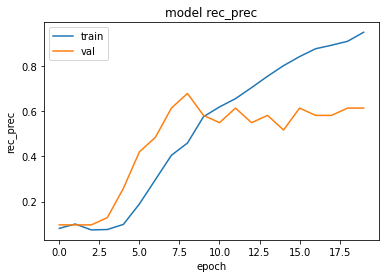

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

        Экономика       1.00      0.50      0.67         2
              Дом       0.67      1.00      0.80         2
           Бизнес       0.50      1.00      0.67         2
             Крым       0.00      0.00      0.00         0
         Из жизни       1.00      0.33      0.50         3
           Россия       0.00      0.00      0.00         2
Силовые структуры       0.67      1.00      0.80         2
   69-я параллель       0.00      0.00      0.00         1
         Ценности       1.00      0.50      0.67         2
            Спорт       0.67      1.00      0.80         2
      Бывший СССР       0.67      0.67      0.67         3
       Библиотека       0.00      0.00      0.00         0
  Наука и техника       0.67      0.67      0.67         3
              Мир       0.00      0.00      0.00         1
   Интернет и СМИ       0.67      1.00      0.80         2
         Культура       0.50      0.67      0.57       

Результат такой же, как и у uncased-модели, несмотря на сниженный dropout.

В общем, получается, что мультиязычный BERT справляется с задачей классификации тесктов лучше

# Задание 2

1) Модель RoBERTa была предложена в статье "RoBERTa: A Robustly Optimized BERT Pretraining Approach" 2019 года сотрудниками подразделения Facebook AI. RoBERTa отличается от BERT по нескольким параметрам:
  - RoBERTa обучается дольше, на большем количестве данных с использованием более объемных батчей.
  - при обучении RoBERTa не решается задача предсказания следующего предложения, которая была в BERT
  - [MASK] токены, которые должна предсказывать модель, меняются динамически в процессе обучения

  В результате этих модификаций RoBERTa несколько превосходит по эффективности BERT.

2) BERT/RoBERTa решают задачу "понимания текста", их можно использовать, например, чтобы заполнить пропуски в текстах или представить текст в виде эмбеддингов, с которыми позже можно работать. T5 может решать, как задачу "понимания", так и задачу генерации текстов. Например, T5 можно попросить перефразировать текст на естественном языке, перевести текст с одного языка на другой или выделить из текста главное.